In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [ ]:
demog = pd.read_csv(".//dataset//demographic.csv")
extmn = pd.read_csv(".//dataset//examination.csv")
qtnr = pd.read_csv(".//dataset//questionnaire.csv")

print("Demographics:", demog.shape, "\n",demog.head())
print("Examination:\n", extmn.shape, "\n", extmn.head())
print("Questionnaire:\n", qtnr.shape,"\n", qtnr.head())


Demographics: (10175, 47) 
     SEQN  SDDSRVYR  RIDSTATR  RIAGENDR  RIDAGEYR  RIDAGEMN  RIDRETH1  \
0  73557         8         2         1        69       NaN         4   
1  73558         8         2         1        54       NaN         3   
2  73559         8         2         1        72       NaN         3   
3  73560         8         2         1         9       NaN         3   
4  73561         8         2         2        73       NaN         3   

   RIDRETH3  RIDEXMON  RIDEXAGM  ...  DMDHREDU  DMDHRMAR  DMDHSEDU  \
0         4       1.0       NaN  ...       3.0       4.0       NaN   
1         3       1.0       NaN  ...       3.0       1.0       1.0   
2         3       2.0       NaN  ...       4.0       1.0       3.0   
3         3       1.0     119.0  ...       3.0       1.0       4.0   
4         3       1.0       NaN  ...       5.0       1.0       5.0   

       WTINT2YR      WTMEC2YR  SDMVPSU  SDMVSTRA  INDHHIN2  INDFMIN2  INDFMPIR  
0  13281.237386  13481.042095        

In [ ]:
demo_sel = demog[['SEQN', 'RIAGENDR', 'RIDAGEYR', 'DMDEDUC2']]
exam_sel = extmn[['SEQN', 'BMXWT', 'BMXHT', 'BMXBMI']]
quest_sel = qtnr[['SEQN', 'SMQ020']]  # Smoking status

df = demo_sel.merge(exam_sel, on='SEQN').merge(quest_sel, on='SEQN')

df.head()

,SEQN,RIAGENDR,RIDAGEYR,DMDEDUC2,BMXWT,BMXHT,BMXBMI,SMQ020
0,73557,1,69,3.0,78.3,171.3,26.7,1.0
1,73558,1,54,3.0,89.5,176.8,28.6,1.0
2,73559,1,72,4.0,88.9,175.3,28.9,1.0
3,73560,1,9,NaN,32.2,137.3,17.1,NaN
4,73561,2,73,5.0,52.0,162.4,19.7,2.0


In [ ]:
df.columns = ['seqn', 'gender', 'age', 'education', 'weight', 'height', 'bmi', 'smoking']

df.info()
df.head()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   seqn       9813 non-null   int64  
 1   gender     9813 non-null   int64  
 2   age        9813 non-null   int64  
 3   education  5588 non-null   float64
 4   weight     9723 non-null   float64
 5   height     9067 non-null   float64
 6   bmi        9055 non-null   float64
 7   smoking    5924 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 613.4 KB


(9813, 8)

In [ ]:
# drop SEQN as its not needed for analysis
df.drop(columns=['seqn'], inplace=True)
df.head()

,gender,age,education,weight,height,bmi,smoking
0,1,69,3.0,78.3,171.3,26.7,1.0
1,1,54,3.0,89.5,176.8,28.6,1.0
2,1,72,4.0,88.9,175.3,28.9,1.0
3,1,9,NaN,32.2,137.3,17.1,NaN
4,2,73,5.0,52.0,162.4,19.7,2.0


In [ ]:
# check for duplicate rows
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,seqn,gender,age,education,weight,height,bmi,smoking


In [ ]:
# check for missing data
df.isnull().sum()

gender          0
age             0
education    4225
weight         90
height        746
bmi           758
smoking      3889
dtype: int64

In [ ]:
# dataset bfore removing missing values
df.shape

(9813, 7)

In [ ]:
# dropping rows with missing values
df.dropna(inplace=True)
df.shape
# dataset after dropping missing values

(5520, 7)

In [29]:
# find outliers in numerical columns

numerical = ['age', 'weight', 'height', 'bmi']
df[numerical].describe()

,age,weight,height,bmi
count,5520.000000,5520.000000,5520.000000,5520.000000
mean,49.027717,81.459076,167.049415,29.102754
std,17.476206,22.110532,10.211242,7.153478
min,20.000000,32.300000,135.400000,14.100000
25%,34.000000,66.100000,159.700000,24.100000
50%,48.000000,78.200000,166.700000,27.900000
75%,63.000000,92.725000,174.300000,32.500000
max,80.000000,222.600000,202.600000,82.900000


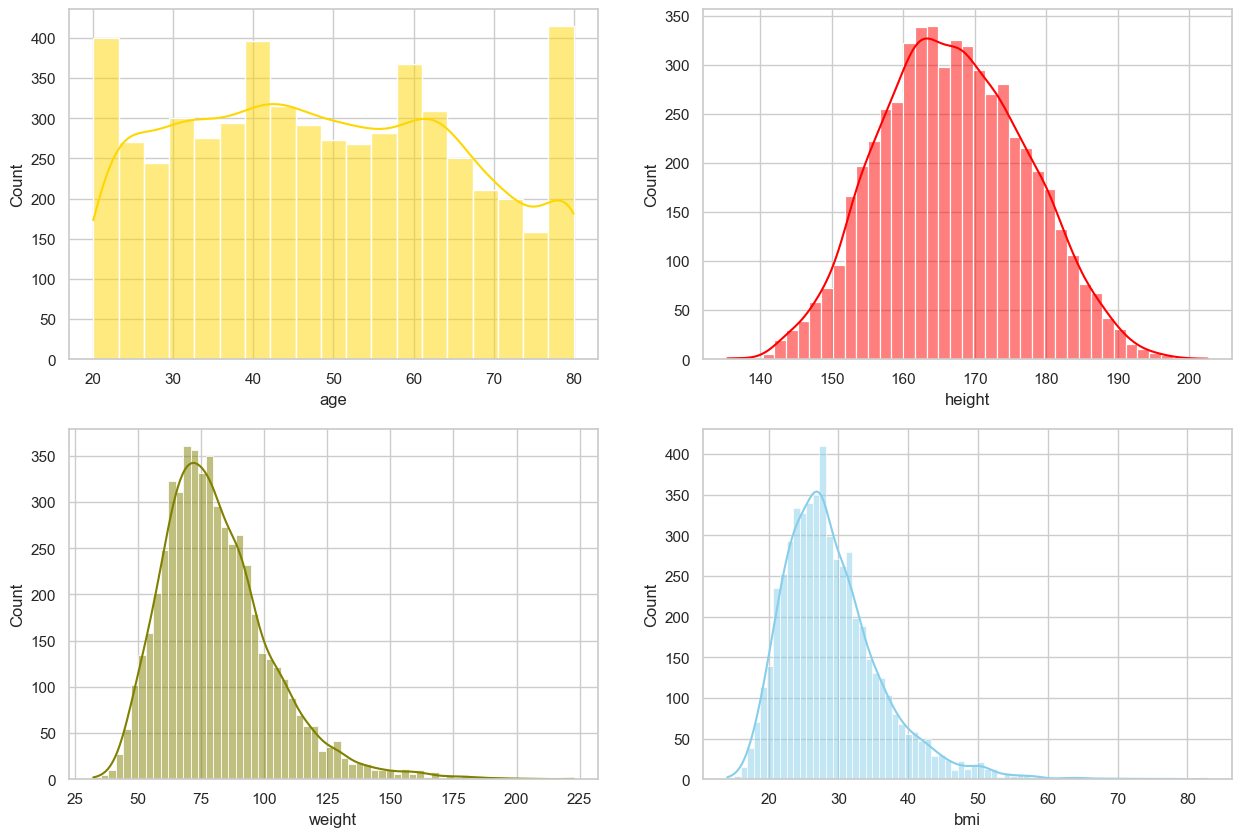

In [35]:
# histogram for numerical columns

fig, axs = plt.subplots(2,2, figsize=(15, 10))
      
sns.histplot(data= df, x="age",kde=True, color="gold", ax=axs[0,0])
sns.histplot(data= df, x="weight", kde=True, color="olive", ax=axs[1,0])
sns.histplot(data= df, x="height", kde=True, color="red", ax=axs[0,1])
sns.histplot(data= df, x="bmi", kde=True, color="skyblue", ax=axs[1,1])

plt.show()

### Outliers

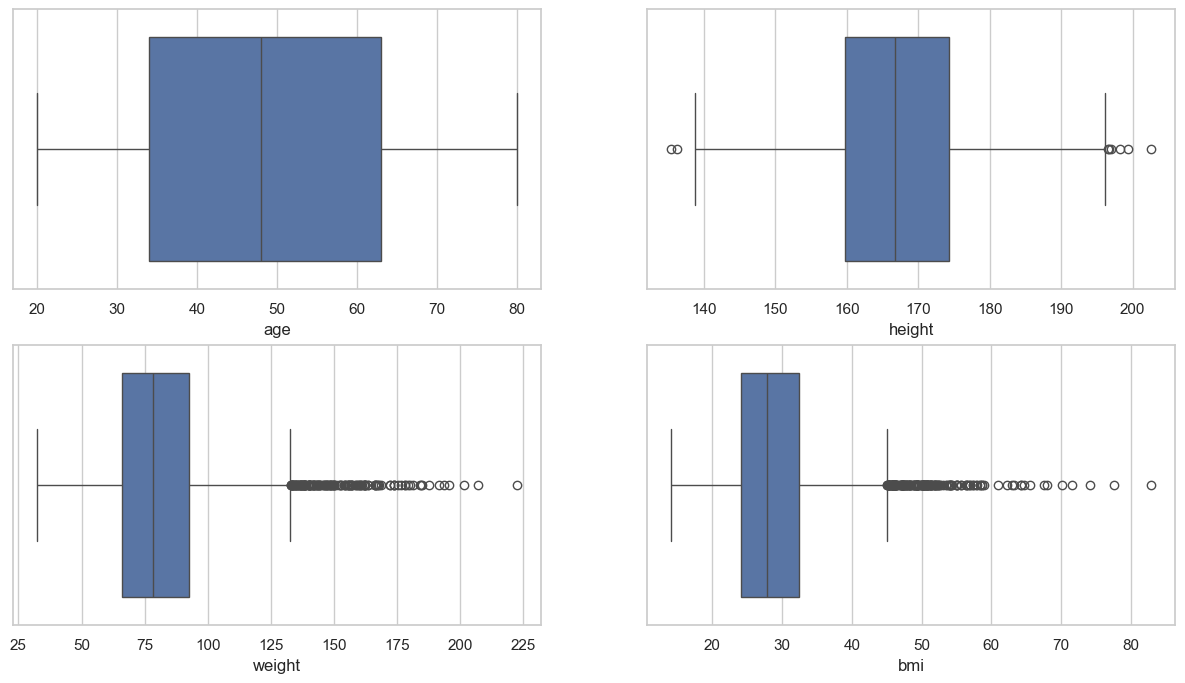

In [44]:
fig, axs = plt.subplots(2,2, figsize=(15,8))
sns.boxplot(x=df['age'], ax = axs[0,0])
sns.boxplot(x=df['weight'], ax = axs[1,0])
sns.boxplot(x=df['height'], ax = axs[0,1])
sns.boxplot(x=df['bmi'], ax = axs[1,1])

plt.show()

In [ ]:
# Height
qh25, qh50, qh75 = np.percentile(df['height'], [25,50,75])
iqrh = qh75-qh25
minh = qh25 - 1.5*iqrh
maxh = qh75 + 1.5*iqrh

#Choose the data inside IQR
data = df[(df['height'] > minh) & (df['height'] < maxh)]


,gender,age,education,weight,height,bmi,smoking
0,1,69,3.0,78.3,171.3,26.7,1.0
1,1,54,3.0,89.5,176.8,28.6,1.0
2,1,72,4.0,88.9,175.3,28.9,1.0
4,2,73,5.0,52.0,162.4,19.7,2.0
5,1,56,4.0,105.0,158.7,41.7,1.0


In [51]:
# Weight
qw25, qw50, qw75 = np.percentile(data['weight'], [25,50,75])
iqrw = qw75-qw25
maxw = qh75 + 1.5*iqrw

#Choose the data inside IQR (only data below the max value of weight since the data is right-skewed)
data = data[data['weight'] < maxw]

In [52]:
# BMI
qb25, qb50, qb75 = np.percentile(data['bmi'], [25,50,75])
iqrb = qb75-qb25
maxb = qb75 + 1.5*iqrb

#Choose the data inside IQR (only data below the max value of bmi since the data is right-skewed)
data = data[data['bmi'] < maxb]

In [53]:
data.shape

(5330, 7)

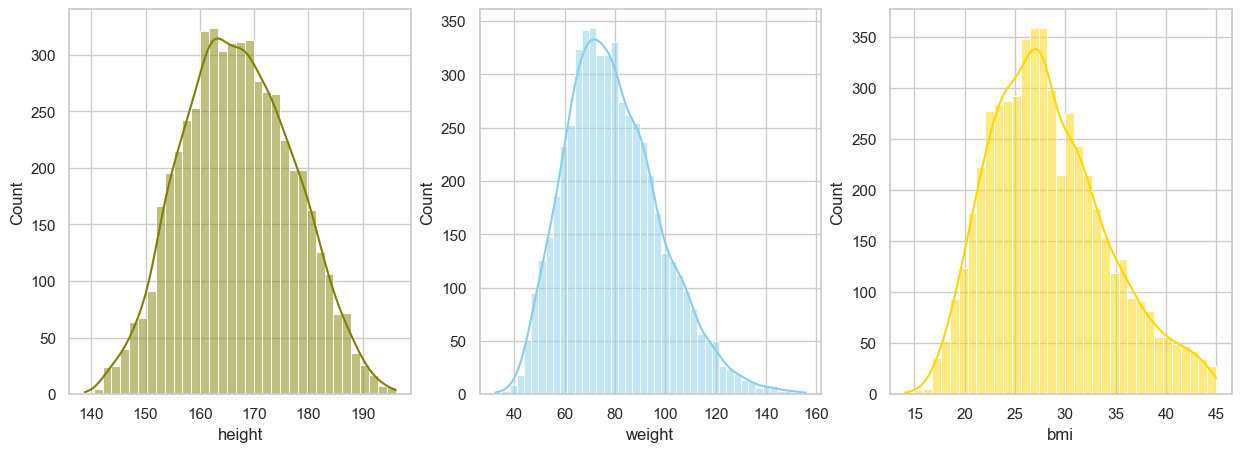

In [ ]:
# distribution after removing outliers using histogram
fig, axs = plt.subplots(1,3, figsize=(15, 5))
      
sns.histplot(data= data, x="weight", kde=True, color="skyblue", ax=axs[1])
sns.histplot(data= data, x="height", kde=True, color="olive", ax=axs[0])
sns.histplot(data= data, x="bmi", kde=True, color="gold", ax=axs[2])

plt.show()

The data is normal distribution after cleaning.

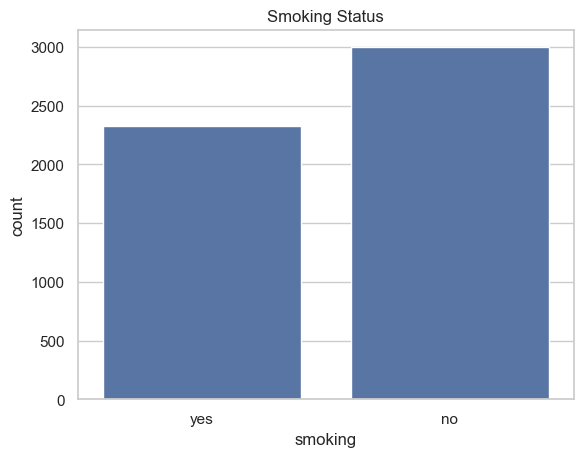

In [ ]:
sns.countplot(data=data, x='smoking')
plt.title("Smoking Status")
plt.show()


# Feature Engineering

In [ ]:
data['smoking'] = data['smoking'].replace({1 : 'yes', 2 : 'no', 7 : np.nan, 9 : np.nan})

data['gender'] = data.gender.replace({1 : 'male', 2 : 'female'})

data['education'] = data.education.replace({1 : '<9th grade', 2 : '9-11th grade',
                                           3 : 'HS or GED', 4 : 'Some college / AA',
                                           5 : 'College or above', 7 : 'Other',
                                           8 : 'Other'})

In [ ]:
categorical = data[['smoking','gender','education']]
categorical.head() 

,smoking,gender,education
0,yes,male,HS or GED
1,yes,male,HS or GED
2,yes,male,Some college / AA
4,no,female,College or above
5,yes,male,Some college / AA


#### One-hot encoding

In [ ]:
dummy = pd.get_dummies(categorical,drop_first=True).astype(int)
dummy.head()

,smoking_yes,gender_male,education_9-11th grade,education_<9th grade,education_College or above,education_HS or GED,education_Other,education_Some college / AA
0,1,1,0,0,0,1,0,0
1,1,1,0,0,0,1,0,0
2,1,1,0,0,0,0,0,1
4,0,0,0,0,1,0,0,0
5,1,1,0,0,0,0,0,1


#### Correlation of variables


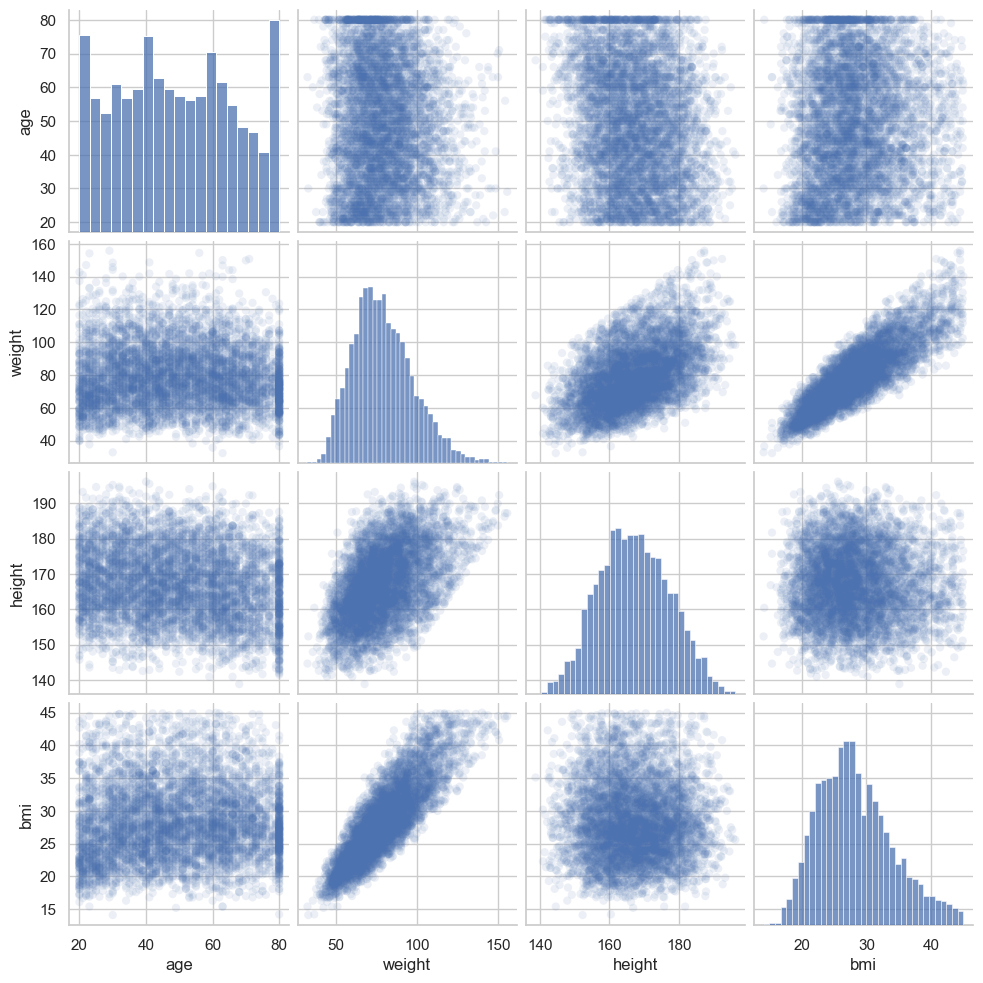

In [ ]:
# Pairplot of numerical variables
sns.pairplot(data, plot_kws=dict(alpha=.1, edgecolor='none'))

Above plot shows that,
weight has positive correlation with BMI.
Height and weight are also a little positively correlated.

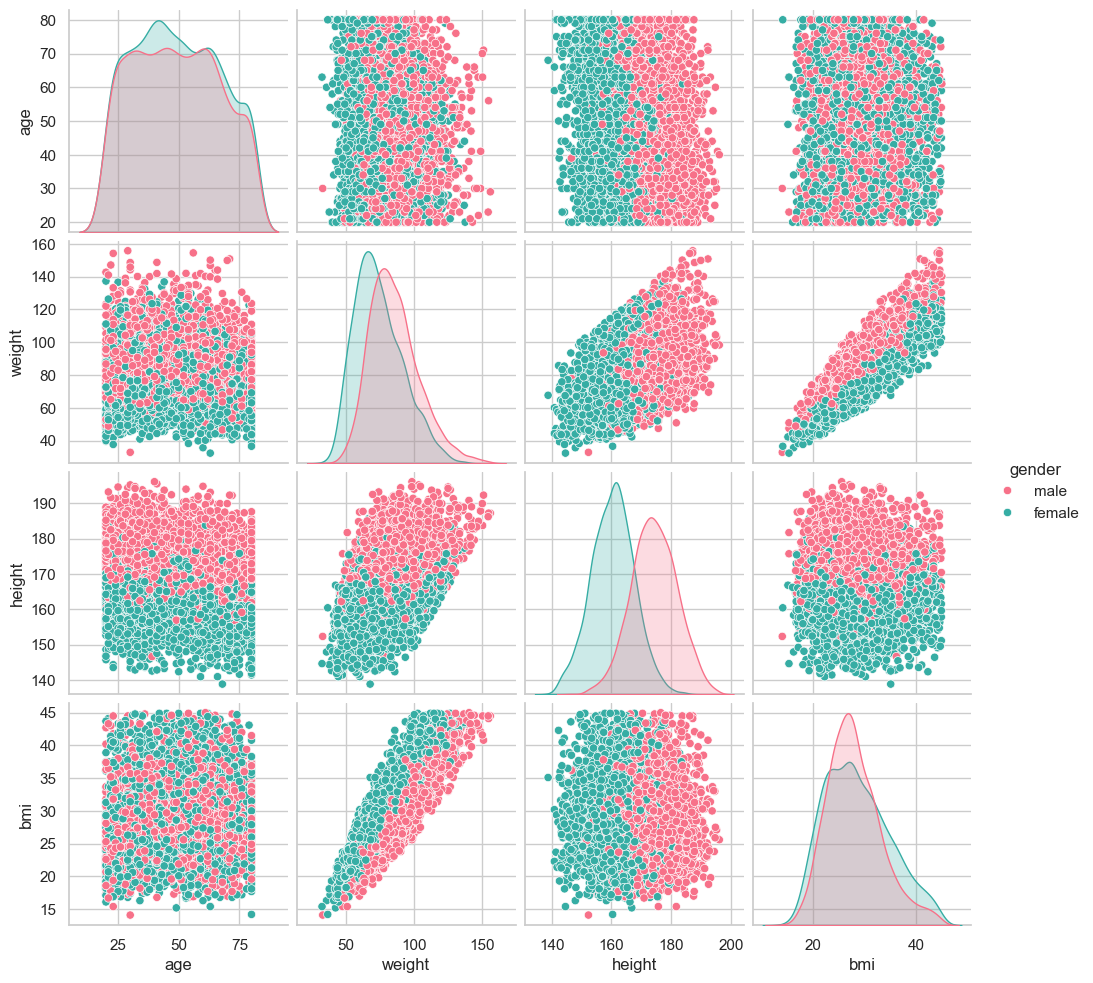

In [63]:
# Pairplot of numerical variables divided by gender
sns.pairplot(data, hue = 'gender', palette = 'husl')

I can observe that in all ages, male relatively has higher weight and height distribution but varied in BMI distribution.

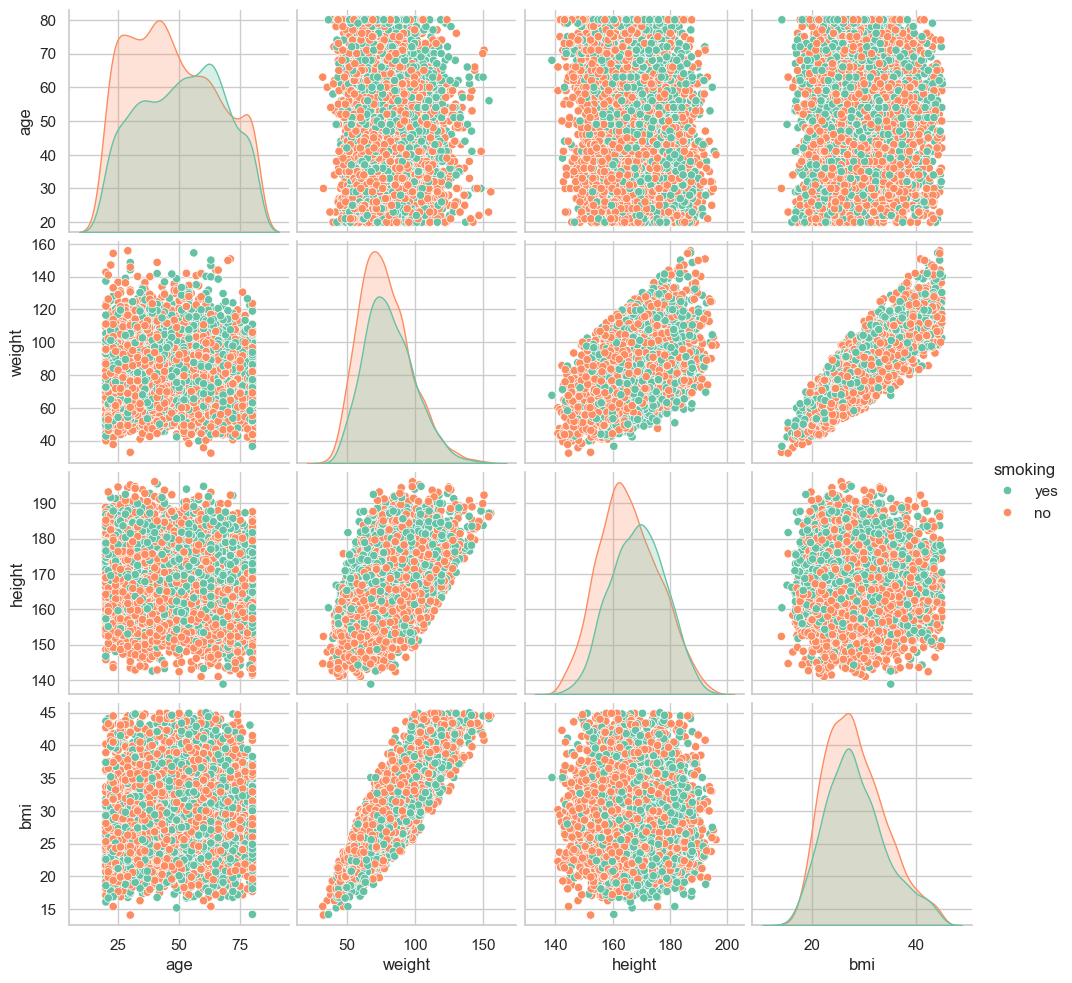

In [ ]:
# Pairplot of numerical variables divided by smoking habit
sns.pairplot(data, hue = 'smoking', palette = 'Set2')

No significant difference is observed.

## Summary

There are no duplicate records, so the unique identifier column (seqn) was dropped as it did not contribute useful information.

Missing values were present in education, weight, height, and BMI columns. Since the missing values were few, the corresponding rows were removed to avoid bias, especially for education where imputation might mislead results.

Histograms showed height follows a roughly normal distribution, while weight and BMI are slightly right-skewed. Boxplots indicated no outliers in age, few in height, and more in the upper ranges of weight and BMI. Outliers were defined as values outside the interquartile range for height, and values above the maximum threshold for weight and BMI.

Pairplot analysis revealed a positive correlation between weight and BMI, with a slight positive correlation between height and weight. Gender-wise, males generally exhibited higher weight and height across all ages, with more variability in BMI. Smoking status appeared to have little impact on the distribution of weight, height, or BMI.